# Analyse Exploratoire des Données (EDA)

Ce notebook réalise une analyse exploratoire sur les deux sous-datasets de 
note énorme dataset sur un trafic réseau IoT :
- Flow Data : Statistiques agrégées des connexions réseau
- Packet Data : Informations détaillées par paquet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [2]:
flow_data = pd.read_pickle('../data/flow_data.pkl')
packet_data = pd.read_pickle('../data/packet_data.pkl')

print(f"Flow Data Shape : {flow_data.shape}")
print(f"Packet Data Shape : {packet_data.shape}")

Flow Data Shape : (2226541, 86)
Packet Data Shape : (2855439, 138)


## Analyse de Flow Data

In [3]:
flow_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Main_Label,Sub_Label,Source_File
0,192.168.137.41-157.249.81.141-46012-443-6,192.168.137.41,46012,157.249.81.141,443,6,03/10/2022 02:17:00 PM,272772,3,4,251.0,7.0,251.0,0.0,83.666667,144.914918,7.0,0.0,1.75,3.5,945.844881,25.662458,45462.0,69430.068135,146326.0,1.0,148950.0,74475.0,104330.777137,148248.0,702.0,126446.0,42148.666667,72145.370498,125453.0,1.0,0,0,0,0,104,136,10.998196,14.664262,0.0,251.0,32.25,88.422282,7818.5,1,2,0,2,6,0,0,0,1.0,36.857143,83.666667,1.75,0,0,0,0,0,0,0,0,0,0,14600,508,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Based,sqlinjection,SqlInjection.pcap_Flow.csv
1,192.168.137.41-157.249.81.141-46024-443-6,192.168.137.41,46024,157.249.81.141,443,6,03/10/2022 02:17:07 PM,270352,3,4,251.0,7.0,251.0,0.0,83.666667,144.914918,7.0,0.0,1.75,3.5,954.311416,25.89217,45058.666667,69231.338738,145582.0,1.0,148085.0,74042.5,103723.372412,147386.0,699.0,124770.0,41590.0,72034.261036,124768.0,1.0,0,0,0,0,104,136,11.096644,14.795526,0.0,251.0,32.25,88.422282,7818.5,1,2,0,2,6,0,0,0,1.0,36.857143,83.666667,1.75,0,0,0,0,0,0,0,0,0,0,14600,508,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Based,sqlinjection,SqlInjection.pcap_Flow.csv
2,192.168.137.41-157.249.81.141-47677-80-6,192.168.137.41,47677,157.249.81.141,80,6,03/10/2022 02:17:08 PM,336328,3,4,196.0,375.0,196.0,0.0,65.333333,113.160653,375.0,0.0,93.75,187.5,1697.747437,20.813016,56054.666667,85986.991387,176953.0,0.0,179786.0,89893.0,125771.668956,178827.0,959.0,159375.0,53125.0,92013.467107,159373.0,0.0,0,0,0,0,104,136,8.919864,11.893152,0.0,375.0,71.375,140.552926,19755.125,1,2,0,2,6,0,0,0,1.0,81.571429,65.333333,93.75,0,0,0,0,0,0,0,0,0,0,14600,508,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Based,sqlinjection,SqlInjection.pcap_Flow.csv
3,192.168.137.41-109.95.152.66-58590-443-6,192.168.137.41,58590,109.95.152.66,443,6,03/10/2022 02:17:12 PM,269617,9,5,524.0,4625.0,517.0,0.0,58.222222,172.057242,2896.0,0.0,925.0,1207.117641,19097.460472,51.925509,20739.769231,48275.328741,139905.0,1.0,269617.0,33702.125,60384.344656,141676.0,1.0,122273.0,30568.25,60074.665966,120680.0,340.0,0,0,0,0,296,168,33.380684,18.544825,0.0,2896.0,343.266667,784.060627,614751.066667,0,2,1,4,13,0,0,0,0.0,367.785714,58.222222,925.0,0,0,0,5149,5,40883,0,0,0,0,14600,235,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Based,sqlinjection,SqlInjection.pcap_Flow.csv
4,192.168.137.41-157.249.81.141-46061-443-6,192.168.137.41,46061,157.249.81.141,443,6,03/10/2022 02:17:24 PM,287558,3,4,251.0,7.0,251.0,0.0,83.666667,144.914918,7.0,0.0,1.75,3.5,897.210302,24.342915,47926.333333,73343.27577,159794.0,1.0,162026.0,81013.0,113459.525682,161241.0,785.0,127764.0,42588.0,71602.694984,125255.0,1.0,0,0,0,0,104,136,10.432678,13.910237,0.0,251.0,32.25,8

In [4]:
flow_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2226541 entries, 0 to 2226540
Data columns (total 86 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Flow ID                     object
 1   Src IP                      object
 2   Src Port                    object
 3   Dst IP                      object
 4   Dst Port                    object
 5   Protocol                    object
 6   Timestamp                   object
 7   Flow Duration               object
 8   Total Fwd Packet            object
 9   Total Bwd packets           object
 10  Total Length of Fwd Packet  object
 11  Total Length of Bwd Packet  object
 12  Fwd Packet Length Max       object
 13  Fwd Packet Length Min       object
 14  Fwd Packet Length Mean      object
 15  Fwd Packet Length Std       object
 16  Bwd Packet Length Max       object
 17  Bwd Packet Length Min       object
 18  Bwd Packet Length Mean      object
 19  Bwd Packet Length Std       object
 20  Flow Bytes/s 

### Statistiques descriptives

In [5]:
flow_data.describe()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Main_Label,Sub_Label,Source_File
count,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2219600.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541,2226541,2226541,2226541,2226541,2226541,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541.0,2226541.0,2226541.0,2226541.0,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541.0,2226541,2226541,2226541
unique,1753169,2416,65536,4472,65171,3,165390,1902538,1412,679,12593.0,6121.0,2079.0,685.0,20957.0,23871.0,1417.0,556.0,11239.0,12572.0,639465.0,1961076.0,2000480.0,1751399.0,1815643.0,1430075.0,1584633.0,1659798.0,1458690.0,1530399.0,1356860.0,288586.0,290684.0,230321.0,282134.0,232810.0,2,1,1,1,1286,1140,1955027.0,754069.0,380.0,2144.0,28324.0,31181.0,31850.0,4,34,3,302,645,1,7,17,52.0,25741.0,19532.0,10393.0,1,1,1,10100,529,35485,720,6684,255,3354,2416,2619,554,13,701538.0,472264.0,654482.0,613306.0,1642836.0,1436796.0,1499948.0,1191878.0,8,17,128
top,8.6.0.1-8.0.6.4-0-0-0,192.168.137.182,4070,192.168.137.182,6668,6,10/08/2022 10:16:07 AM,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,512,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS,DoS SYN Flood,DoS-SYN_Flood.pcap_Flow.csv
freq,307,744530,100172,150499,496738,1723316,1715,7207,435428,1334012,1594277.0,2018185.0,1594277.0,1670571.0,1594277.0,2137632.0,2018185.0,2065795.0,2018185.0,2172144.0,1533200.0,7207.0,7207.0,461300.0,7207.0,65156.0,443039.0,443039.0,756234.0,443039.0,481734.0,1900757.0,1900757.0,1986523.0,1900757.0,1923064.0,2212341,2226541,2226541,2226541,327211,1335485,7207.0,1334078.0,1702247.0,1540141.0,1540141.0,1954338.0,1954338.0,2156834,754328,1437248,2141814,1308099,2226541,2225776,2225794,1694687.0,1540141.0,1594277.0,2018185.0,2226541,2226541,2226541,2174942,2174942,2174953,1360863,1726012,1895441,2171565,1200549,1803186,1691172,1320438,1481705.0,1743581.0,1481705.0,1481705.0,490978.0,775919.0,490978.0,490978.0,1853537,1304003,319234


In [6]:
categorical_cols_flow = flow_data.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols_flow}\n")

for col in categorical_cols_flow[:5]:
    print(f"\n{col}:")
    print(flow_data[col].value_counts().head(10))

/var/folders/nf/b7xsxv6d63n85925f8r077sh0000gn/T/ipykernel_97076/3520610433.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols_flow = flow_data.select_dtypes(include=['object', 'category']).columns.tolist()


Categorical columns: ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Coun

### Analyse des valeurs manquantes

In [7]:
missing_flow = flow_data.isnull().sum()
missing_pct_flow = (missing_flow / len(flow_data) * 100).round(2)
missing_df_flow = pd.DataFrame({
    'Missing Count': missing_flow,
    'Missing %': missing_pct_flow
}).sort_values(by='Missing %', ascending=False)

missing_df_flow[missing_df_flow['Missing Count'] > 0]

,Missing Count,Missing %
Flow Bytes/s,6941,0.31


Le dataset a peu de valeurs manquantes. Cependant il faudrait quand meme les
supprimer pour éviter que ce genre de données viennent "polluer" compromettre
les entrainements de nos modèles.

### Analyse de la distribution des classes

L'analyse de la distribution des labels est **cruciale** pour la classification de trafic réseau. Un dataset déséquilibré peut biaiser le modèle vers les classes majoritaires.

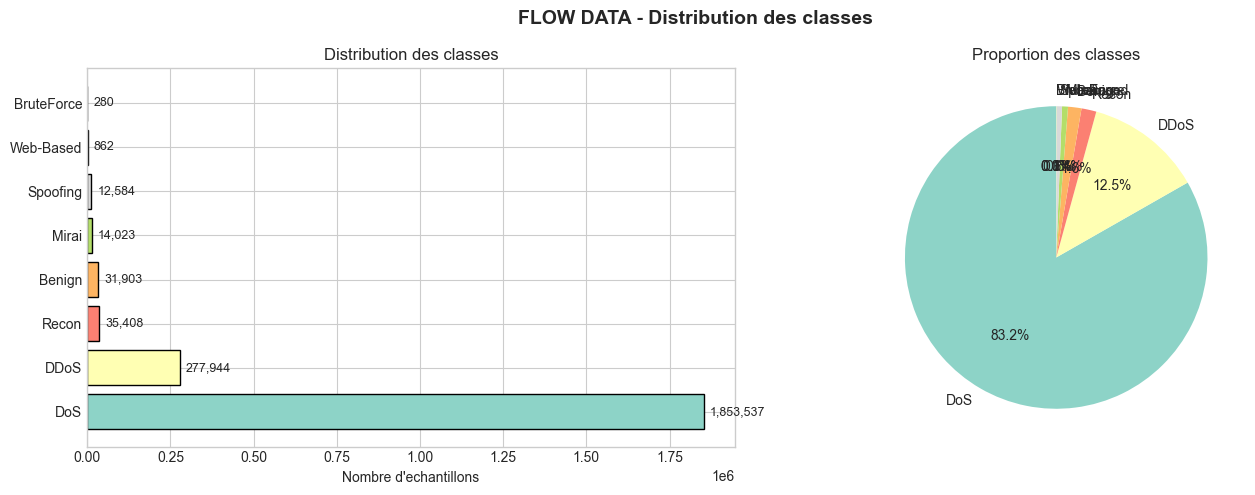

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

main_label_counts = flow_data['Main_Label'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(main_label_counts)))

axes[0].barh(main_label_counts.index, main_label_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Nombre d\'echantillons')
axes[0].set_title('Distribution des classes')
for i, v in enumerate(main_label_counts.values):
    axes[0].text(v + main_label_counts.max()*0.01, i, f'{v:,}', va='center', fontsize=9)

axes[1].pie(main_label_counts.values, labels=main_label_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Proportion des classes')

plt.suptitle('FLOW DATA - Distribution des classes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
print(f"Total echantillons : {len(flow_data):,}")
print(f"Nombre de classes  : {flow_data['Main_Label'].nunique()}")
print(f"\n{'Classe':<15} {'Count':>12} {'%':>8} {'Ratio':>10}")
print("-" * 50)
for label, count in main_label_counts.items():
    ratio = main_label_counts.max() / count
    print(f"{label:<15} {count:>12,} {count/len(flow_data)*100:>7.2f}% {ratio:>9.1f}x")
print("-" * 50)
print(f"Classe majoritaire : {main_label_counts.idxmax()} ({main_label_counts.max()/len(flow_data)*100:.1f}%)")
print(f"Classe minoritaire : {main_label_counts.idxmin()} ({main_label_counts.min()/len(flow_data)*100:.2f}%)")
print(f"Ratio max/min      : {main_label_counts.max()/main_label_counts.min():.0f}x")

Total echantillons : 2,226,541
Nombre de classes  : 8

Classe                 Count        %      Ratio
--------------------------------------------------
DoS                1,853,537   83.25%       1.0x
DDoS                 277,944   12.48%       6.7x
Recon                 35,408    1.59%      52.3x
Benign                31,903    1.43%      58.1x
Mirai                 14,023    0.63%     132.2x
Spoofing              12,584    0.57%     147.3x
Web-Based                862    0.04%    2150.3x
BruteForce               280    0.01%    6619.8x
--------------------------------------------------
Classe majoritaire : DoS (83.2%)
Classe minoritaire : BruteForce (0.01%)
Ratio max/min      : 6620x


### Doublons et valeurs uniques

In [10]:
duplicates_flow = flow_data.duplicated().sum()
print(f"Lignes dupliquees : {duplicates_flow:,} ({duplicates_flow/len(flow_data)*100:.2f}%)")

print(f"\nTop 10 colonnes avec le plus de valeurs uniques :")
unique_counts_flow = flow_data.nunique().sort_values(ascending=False)
print(unique_counts_flow.head(10))

Lignes dupliquees : 295 (0.01%)

Top 10 colonnes avec le plus de valeurs uniques :
Flow IAT Mean     2000480
Flow Packets/s    1961076
Fwd Packets/s     1955027
Flow Duration     1902538
Flow IAT Max      1815643
Flow ID           1753169
Flow IAT Std      1751399
Fwd IAT Mean      1659798
Idle Mean         1642836
Fwd IAT Total     1584633
dtype: int64


## Analyse du Packet Data

### Aperçu des données

In [11]:
packet_data.head()

,stream,src_mac,dst_mac,src_ip,dst_ip,src_port,dst_port,inter_arrival_time,time_since_previously_displayed_frame,port_class_dst,l4_tcp,l4_udp,ttl,eth_size,tcp_window_size,payload_entropy,handshake_version,handshake_cipher_suites_length,handshake_ciphersuites,handshake_extensions_length,tls_server,handshake_sig_hash_alg_len,http_request_method,http_host,http_response_code,user_agent,dns_server,dns_query_type,dns_len_qry,dns_interval,dns_len_ans,device_mac,eth_src_oui,eth_dst_oui,payload_length,highest_layer,http_uri,http_content_len,http_content_type,icmp_type,icmp_checksum_status,icmp_data_size,jitter,stream_1_count,stream_1_mean,stream_1_var,src_ip_1_count,src_ip_1_mean,src_ip_1_var,src_ip_mac_1_count,src_ip_mac_1_mean,src_ip_mac_1_var,channel_1_count,channel_1_mean,channel_1_var,stream_jitter_1_sum,stream_jitter_1_mean,stream_jitter_1_var,stream_5_count,stream_5_mean,stream_5_var,src_ip_5_count,src_ip_5_mean,src_ip_5_var,src_ip_mac_5_count,src_ip_mac_5_mean,src_ip_mac_5_var,channel_5_count,channel_5_mean,channel_5_var,stream_jitter_5_sum,stream_jitter_5_mean,stream_jitter_5_var,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,src_ip_mac_10_count,src_ip_mac_10_mean,src_ip_mac_10_var,channel_10_count,channel_10_mean,channel_10_var,stream_jitter_10_sum,stream_jitter_10_mean,stream_jitter_10_var,stream_30_count,stream_30_mean,stream_30_var,src_ip_30_count,src_ip_30_mean,src_ip_30_var,src_ip_mac_30_count,src_ip_mac_30_mean,src_ip_mac_30_var,channel_30_count,channel_30_mean,channel_30_var,stream_jitter_30_sum,stream_jitter_30_mean,stream_jitter_30_var,stream_60_count,stream_60_mean,stream_60_var,src_ip_60_count,src_ip_60_mean,src_ip_60_var,src_ip_mac_60_count,src_ip_mac_60_mean,src_ip_mac_60_var,channel_60_count,channel_60_mean,channel_60_var,stream_jitter_60_sum,stream_jitter_60_mean,stream_jitter_60_var,ntp_interval,most_freq_spot,min_et,q1,min_e,var_e,q1_e,sum_p,min_p,max_p,med_p,average_p,var_p,q3_p,q1_p,iqr_p,l3_ip_dst_count,Main_Label,Sub_Label,Source_File
0,0,Arlo Q Indoor Camera,3c:18:a0:41:c3:a0,192.168.137.175,99.81.244.93,56891,443,0.000164,0.000164,1,1,0,64,2962,1181,3.582978,-1,0,-1,0,none,0,none,none,0,none,none,NaN,0,0.0,0,Arlo Q Indoor Camera,Netgear,Luxshare Precision Industry Company Limited,2896,TCP,none,0,none,-1,-1,-1,0.000164,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,0.000164,0.000164,NaN,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,0.000164,0.000164,NaN,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,0.000164,0.000164,NaN,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,0.000164,0.000164,NaN,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,2.0,2962.000000,0.000000e+00,0.000164,0.000164,NaN,0.0,56891,2928.0,2928.0,2962.0,0.000000e+00,2962.0,58160.0,2908.0,2908.0,2908.0,2908.00,0.000000e+00,2908.0,2908.0,0.0,1.0,BenignTraffic,BenignTraffic,BenignTraffic.csv
1,0,Arlo Q Indoor Camera,3c:18:a0:41:c3:a0,192.168.137.175,99.81.244.93,56891,443,0.008173,0.000098,1,1,0,64,2962,1181,3.584523,-1,0,-1,0,none,0,none,none,0,none,none,NaN,0,0.0,0,Arlo Q Indoor Camera,Netgear,Luxshare Precision Industry Company Limited,2896,TCP,none,0,none,-1,-1,-1,0.000098,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,0.008173,0.000908,0.000004,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,0.008173,0.000908,0.000004,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,0.008173,0.000908,0.000004,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.296025e+06,10.0,2141.700000,1.29602

In [12]:
packet_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2855439 entries, 0 to 2855438
Columns: 138 entries, stream to Source_File
dtypes: float64(97), int64(22), object(1), str(18)
memory usage: 2.9+ GB


### Statistiques descriptives

In [13]:
packet_data.describe()

,stream,src_port,dst_port,inter_arrival_time,time_since_previously_displayed_frame,port_class_dst,l4_tcp,l4_udp,ttl,eth_size,tcp_window_size,payload_entropy,handshake_cipher_suites_length,handshake_ciphersuites,handshake_extensions_length,handshake_sig_hash_alg_len,http_response_code,dns_query_type,dns_len_qry,dns_interval,dns_len_ans,payload_length,http_content_len,icmp_type,icmp_checksum_status,icmp_data_size,jitter,stream_1_count,stream_1_mean,stream_1_var,src_ip_1_count,src_ip_1_mean,src_ip_1_var,src_ip_mac_1_count,src_ip_mac_1_mean,src_ip_mac_1_var,channel_1_count,channel_1_mean,channel_1_var,stream_jitter_1_sum,stream_jitter_1_mean,stream_jitter_1_var,stream_5_count,stream_5_mean,stream_5_var,src_ip_5_count,src_ip_5_mean,src_ip_5_var,src_ip_mac_5_count,src_ip_mac_5_mean,src_ip_mac_5_var,channel_5_count,channel_5_mean,channel_5_var,stream_jitter_5_sum,stream_jitter_5_mean,stream_jitter_5_var,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,src_ip_mac_10_count,src_ip_mac_10_mean,src_ip_mac_10_var,channel_10_count,channel_10_mean,channel_10_var,stream_jitter_10_sum,stream_jitter_10_mean,stream_jitter_10_var,stream_30_count,stream_30_mean,stream_30_var,src_ip_30_count,src_ip_30_mean,src_ip_30_var,src_ip_mac_30_count,src_ip_mac_30_mean,src_ip_mac_30_var,channel_30_count,channel_30_mean,channel_30_var,stream_jitter_30_sum,stream_jitter_30_mean,stream_jitter_30_var,stream_60_count,stream_60_mean,stream_60_var,src_ip_60_count,src_ip_60_mean,src_ip_60_var,src_ip_mac_60_count,src_ip_mac_60_mean,src_ip_mac_60_var,channel_60_count,channel_60_mean,channel_60_var,stream_jitter_60_sum,stream_jitter_60_mean,stream_jitter_60_var,ntp_interval,most_freq_spot,min_et,q1,min_e,var_e,q1_e,sum_p,min_p,max_p,med_p,average_p,var_p,q3_p,q1_p,iqr_p,l3_ip_dst_count
count,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2855439.0,2.855439e+06,2.855439e+06,2.855439e+06,22175.000000,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,1.765231e+06,2.855439e+06,2.855439e+06,1.617102e+06,2.818708e+06,2.818708e+06,2.756301e+06,2.855439e+06,2.855439e+06,2.773113e+06,2.855439e+06,2.855439e+06,2.800038e+06,1.765231e+06,1.765231e+06,1.589739e+06,2.855439e+06,2.855439e+06,1.670402e+06,2.818708e+06,2.818708e+06,2.791081e+06,2.855439e+06,2.855439e+06,2.818242e+06,2.855439e+06,2.855439e+06,2.822856e+06,1.765231e+06,1.765231e+06,1.624707e+06,2.855439e+06,2.855439e+06,1.711855e+06,2.818708e+06,2.818708e+06,2.803858e+06,2.855439e+06,2.855439e+06,2.834346e+06,2.855439e+06,2.855439e+06,2.837557e+06,1.765231e+06,1.765231e+06,1.645749e+06,2.855439e+06,2.855439e+06,1.741462e+06,2.818708e+06,2.818708e+06,2.811823e+06,2.855439e+06,2.855439e+06,2.845817e+06,2.855439e+06,2.855439e+06,2.846329e+06,1.765231e+06,1.765231e+06,1.657359e+06,2.855439e+06,2.855439e+06,1.749227e+06,2.818708e+06,2.818708e+06,2.814190e+06,2.855439e+06,2.855439e+06,2.849180e+06,2.855439e+06,2.855439e+06,2.848967e+06,1.765231e+06,1.765231e+06,1.660759e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06,2.855439e+06
mean,4.806234e+04,2.610114e+04,1.740781e+04,4.308398e+03,1.072668e-02,1.515071e+00,3.335543e-01,4.023486e-01,6.909126e+01,5.153610e+02,1.171263e+04,1.318400e+00,7.122898e-02,-1.0,1.106975e-01,1.092652e-02,4.419646e-01,6.167756,1.677535e-01,1.712833e-01,3.974170e-02,4.605181e+02,7.186434e+00,-3.338009e-01,-8.467801e-01,1.350797e+02,1.639578e+01,4.096098e+02,5.160800e+02,2.557322e+05,2.472375e+03,5.207039e+02,1.589102e+05,1.639927e+03,5.149027e+02,1.579528e+05,2.468716e+03,5.164985e+02,2.028613e+05,7.939564e+01,3.149118e+01,6.250685e+06,1.668596e+03,5.155507e+02,2.542972e+05,1.008289e+04,5.203954e+02,1.581862e+05,6.540242e+03,5.14

In [14]:
categorical_cols_packet = packet_data.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols_packet}\n")

for col in categorical_cols_packet[:5]:
    print(f"\n{col}:")
    print(packet_data[col].value_counts().head(10))

/var/folders/nf/b7xsxv6d63n85925f8r077sh0000gn/T/ipykernel_97076/2996561987.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols_packet = packet_data.select_dtypes(include=['object', 'category']).columns.tolist()


Categorical columns: ['src_mac', 'dst_mac', 'src_ip', 'dst_ip', 'handshake_version', 'tls_server', 'http_request_method', 'http_host', 'user_agent', 'dns_server', 'device_mac', 'eth_src_oui', 'eth_dst_oui', 'highest_layer', 'http_uri', 'http_content_type', 'Main_Label', 'Sub_Label', 'Source_File']


src_mac:
src_mac
dc:a6:32:dc:27:d5       524712
dc:a6:32:c9:e4:90       387176
dc:a6:32:c9:e4:d5       348278
e4:5f:01:55:90:c4       342147
dc:a6:32:c9:e4:ab       318949
dc:a6:32:c9:e5:ef       272204
dc:a6:32:c9:e5:a4       250771
3c:18:a0:41:c3:a0       137467
Arlo Q Indoor Camera     31409
Amazon Echo Studio       16550
Name: count, dtype: int64

dst_mac:
dst_mac
3c:18:a0:41:c3:a0            146654
Sonos One Speaker            107579
GoSund Power strip (2)       104749
AMCREST WiFi Camera           98829
GoSund Smart plug WP2 (3)     91588
Amazon Echo Dot 1             91313
Teckin Light Strip            87043
Nest Indoor Camera            72671
LampUX RGB                    72522
Teck

### Analyse des valeurs manquantes

In [15]:
missing_packet = packet_data.isnull().sum()
missing_pct_packet = (missing_packet / len(packet_data) * 100).round(2)
missing_df_packet = pd.DataFrame({
    'Missing Count': missing_packet,
    'Missing %': missing_pct_packet
}).sort_values(by='Missing %', ascending=False)

missing_df_packet[missing_df_packet['Missing Count'] > 0]

,Missing Count,Missing %
dns_query_type,2833264,99.22
stream_jitter_1_var,1265700,44.33
stream_1_var,1238337,43.37
stream_jitter_5_var,1230732,43.10
stream_jitter_10_var,1209690,42.36
stream_jitter_30_var,1198080,41.96
stream_jitter_60_var,1194680,41.84
stream_5_var,1185037,41.50
stream_10_var,1143584,40.05
stream_30_var,1113977,39.01


### Analyse de l'équilibre des classes

Comme pour le Flow Data, on analyse le déséquilibre des classes dans le Packet Data.

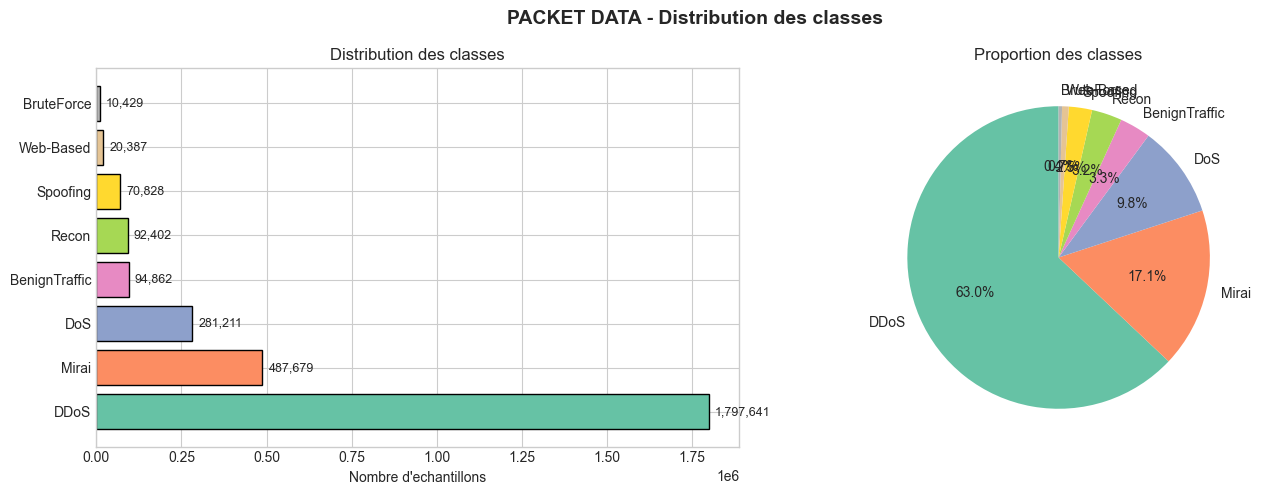

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

main_label_counts = packet_data['Main_Label'].value_counts()
colors = plt.cm.Set2(np.linspace(0, 1, len(main_label_counts)))

axes[0].barh(main_label_counts.index, main_label_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Nombre d\'echantillons')
axes[0].set_title('Distribution des classes')
for i, v in enumerate(main_label_counts.values):
    axes[0].text(v + main_label_counts.max()*0.01, i, f'{v:,}', va='center', fontsize=9)

axes[1].pie(main_label_counts.values, labels=main_label_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Proportion des classes')

plt.suptitle('PACKET DATA - Distribution des classes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
print(f"Total echantillons : {len(packet_data):,}")
print(f"Nombre de classes  : {packet_data['Main_Label'].nunique()}")
print(f"\n{'Classe':<15} {'Count':>12} {'%':>8} {'Ratio':>10}")
print("-" * 50)
for label, count in main_label_counts.items():
    ratio = main_label_counts.max() / count
    print(f"{label:<15} {count:>12,} {count/len(packet_data)*100:>7.2f}% {ratio:>9.1f}x")
print("-" * 50)
print(f"Classe majoritaire : {main_label_counts.idxmax()} ({main_label_counts.max()/len(packet_data)*100:.1f}%)")
print(f"Classe minoritaire : {main_label_counts.idxmin()} ({main_label_counts.min()/len(packet_data)*100:.2f}%)")
print(f"Ratio max/min      : {main_label_counts.max()/main_label_counts.min():.0f}x")

Total echantillons : 2,855,439
Nombre de classes  : 8

Classe                 Count        %      Ratio
--------------------------------------------------
DDoS               1,797,641   62.95%       1.0x
Mirai                487,679   17.08%       3.7x
DoS                  281,211    9.85%       6.4x
BenignTraffic         94,862    3.32%      19.0x
Recon                 92,402    3.24%      19.5x
Spoofing              70,828    2.48%      25.4x
Web-Based             20,387    0.71%      88.2x
BruteForce            10,429    0.37%     172.4x
--------------------------------------------------
Classe majoritaire : DDoS (63.0%)
Classe minoritaire : BruteForce (0.37%)
Ratio max/min      : 172x


### Doublons et valeurs uniques

In [18]:
duplicates_packet = packet_data.duplicated().sum()
print(f"Lignes dupliquees : {duplicates_packet:,} ({duplicates_packet/len(packet_data)*100:.2f}%)")

print(f"\nTop 10 colonnes avec le plus de valeurs uniques :")
unique_counts_packet = packet_data.nunique().sort_values(ascending=False)
print(unique_counts_packet.head(10))

Lignes dupliquees : 0 (0.00%)

Top 10 colonnes avec le plus de valeurs uniques :
inter_arrival_time       2822418
channel_60_var           1899090
channel_30_var           1841417
stream_jitter_60_mean    1741199
stream_jitter_30_mean    1740560
stream_jitter_10_mean    1738805
stream_jitter_5_mean     1735707
stream_jitter_1_mean     1717345
channel_10_var           1705532
stream_jitter_60_var     1658714
dtype: int64


## Conclusion et recommandations

Les deux datasets presentent un déséquilibre significatif des classes :
- **Flow Data** : La classe DoS domine largement avec environ 83% des données, tandis que les classes minoritaires telles que BruteForce et Web-Based représentent moins de 0.1% du dataset. Le ratio entre la classe majoritaire et minoritaire atteint ~6600x, ce qui indique un déséquilibre extrême.
- **Packet Data** : La classe DDoS représente environ 63% des données, avec une distribution légèrement plus équilibrée que le Flow Data. Le ratio max/min est de ~172x, ce qui reste significatif mais plus gérable.

Pour régler ces différents problèmes, voici nos recommandations :

- Gérer le déséquilibre des classes
   - Faire de l'oversampling pour augmenter les classes minoritaires
   - Faire de l'undersampling pour diminuer les classes majoritaires
   - Ponderer les classes lors de l'entrainement

- Nettoyer les données
   - Traiter les valeurs manquantes selon leur importance
   - Supprimer ou cap les outliers detectes

- Feature Engineering
   - Encoder les variables categorielles (Label Encoding, One-Hot)
   - Normaliser/Standardiser les features numeriques
   - Reduire la dimensionnalite si necessaire (PCA, Feature Selection)